In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

C:\Users\SCS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('hiring.csv')

In [3]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [5]:
df.experience.unique()

array([nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
      dtype=object)

In [6]:
df['experience'] = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)

C:\Users\SCS\AppData\Local\Temp\ipykernel_38292\4128211399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median(), inplace=True)


In [8]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [9]:
from word2number import w2n
df['experience']=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [11]:
df.describe()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
count,8.00000,8.000000,8.000000,8.00000
mean,4.75000,7.875000,7.875000,63000.00000
std,4.26782,1.246423,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,8.000000,7.500000,63500.00000
75%,7.75000,8.250000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


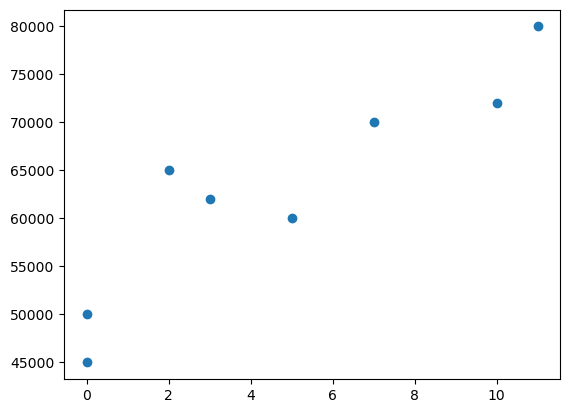

In [12]:
plt.scatter(df['experience'],df['salary($)'])

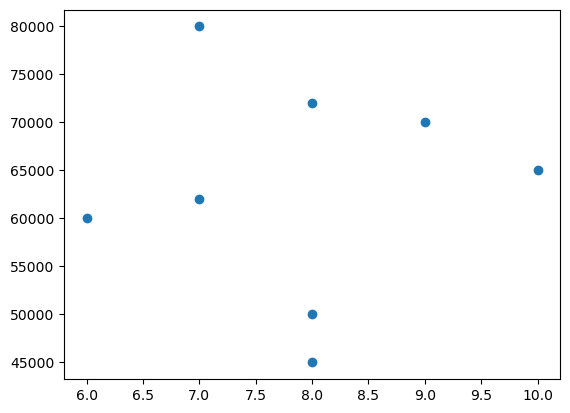

In [13]:
plt.scatter(df['test_score(out of 10)'],df['salary($)'])

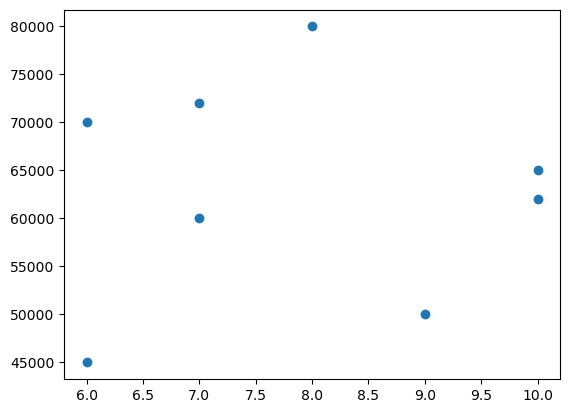

In [14]:
plt.scatter(df['interview_score(out of 10)'],df['salary($)'])

In [15]:
X = df.drop('salary($)', axis=1)
y = df['salary($)']

In [16]:
X

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [17]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)


LinearRegression()

In [19]:
predictions=reg.predict(X)
scores=pd.DataFrame({'Actual':y,'Prediction':predictions})
scores

,Actual,Prediction
0,50000,52350.072780
1,45000,45734.352256
2,60000,58312.954876
3,65000,63872.634643
4,70000,67270.742358
5,62000,61148.471616
6,72000,76069.141194
7,80000,79241.630277


In [20]:
future_candidate=pd.DataFrame({
    'experience':[2,12],
    'test_score(out of 10)':[9,10],
    'interview_score(out of 10)':[6,10]
    
})
salary_predict=reg.predict(future_candidate)
future_candidate['salary_predict']=salary_predict
future_candidate

,experience,test_score(out of 10),interview_score(out of 10),salary_predict
0,2,9,6,53205.967977
1,12,10,10,92002.183406
